### Binomial Distribution

Binomial Distribution
– [https://en.wikipedia.org/wiki/Binomial_distribution]

Experiment:<br>
    N trials with two possible outcomes (True of False).<br>
    The probabilities of these outcomes p & q=(1-p) .<br>
    The trials are independent from each other.<br>
<br>
Then:<br>
    The probability of having “x” True values (out of N) is:<br>
<br>
         f(x) = C(N,x)*p<sup>x</sup>*(1-p)<sup>(N-x)</sup><br>
<br>
where C(N,x) = N!/(x!*(N-x)!) – a binomial coefficient<br>
<br>
Mean value = Expected value E(x) = N*p<br>
Variance = N*p*(1-p).<br>
<br>
When N is large, the shape of f(x) converges to bell-shaped Normal Gaussian distribution with sigma = sqrt(Npq) = sqrt(N)/2 if p=q=0.5<br>

In [1]:
import os, sys, math
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from scipy.stats import binom, binom_test
from scipy.stats.distributions import chi2

In [2]:
# scipy.stats.binom_test(x,N,p)
# exact test (two-sided by default) 
# of the null hypothesis that the probability 
# of success in a Bernoulli experiment is p.
#
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom_test.html

N = 1000
# default value of p = 0.5

xx = list(range(1000))
yy0 = [ binom_test(x, n=N, alternative='less'     ) for x in xx ] 
yy1 = [ binom_test(x, n=N, alternative='greater'  ) for x in xx ] 
yy2 = [ binom_test(x, n=N, alternative='two-sided') for x in xx ] 
yy3 = [ binom_test(x, n=N) for x in xx ] # default = two-sided

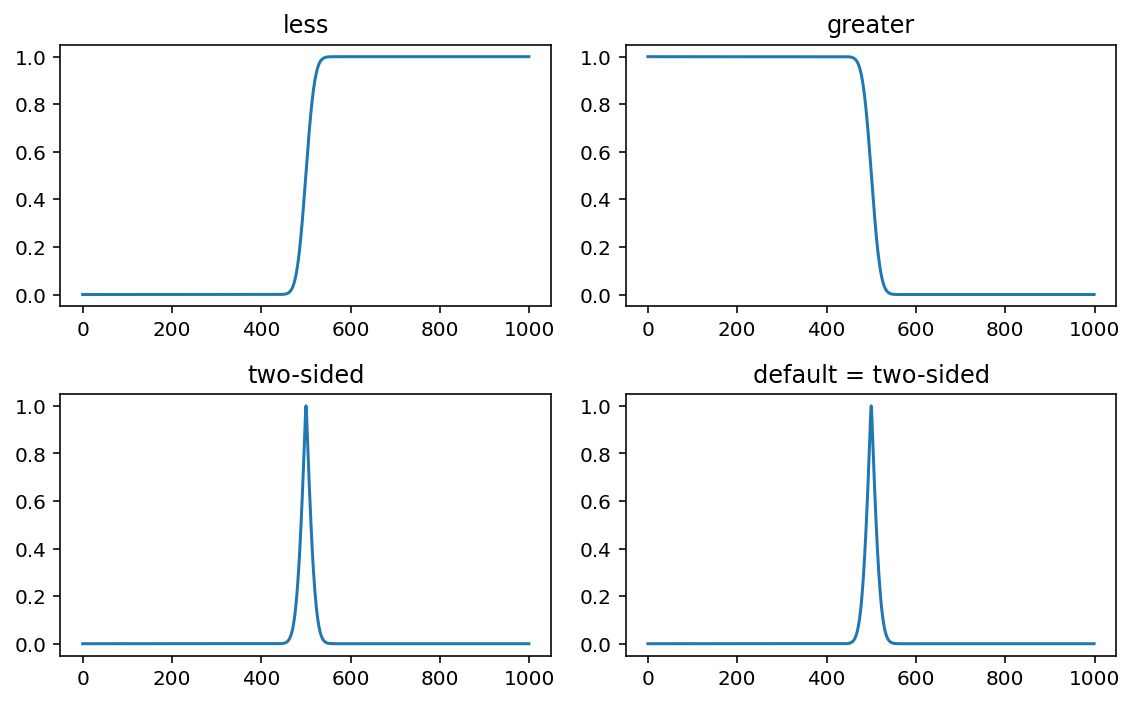

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,5))
ax0, ax1, ax2, ax3 = axes.flatten()
_ = ax0.plot(xx,yy0)
_ = ax0.set_title('less')
_ = ax1.plot(xx,yy1)
_ = ax1.set_title('greater')
_ = ax2.plot(xx,yy2)
_ = ax2.set_title('two-sided')
_ = ax3.plot(xx,yy3)
_ = ax3.set_title('default = two-sided')
fig.tight_layout()
plt.show() ;

In [4]:
# pmf = probability mass function
# gives the probability that a discrete random variable
# is exactly equal to some value

for x in range(455,550,5):
    p_val = binom_test(x, 1000, 0.5, alternative='two-sided')
    pmf   = binom.pmf (x, 1000, 0.5)
    print(f"{x} : {p_val:.4f} : {pmf:.4f}")

455 : 0.0049 : 0.0004
460 : 0.0124 : 0.0010
465 : 0.0291 : 0.0022
470 : 0.0620 : 0.0042
475 : 0.1212 : 0.0072
480 : 0.2174 : 0.0113
485 : 0.3591 : 0.0161
490 : 0.5480 : 0.0207
495 : 0.7760 : 0.0240
500 : 1.0000 : 0.0252
505 : 0.7760 : 0.0240
510 : 0.5480 : 0.0207
515 : 0.3591 : 0.0161
520 : 0.2174 : 0.0113
525 : 0.1212 : 0.0072
530 : 0.0620 : 0.0042
535 : 0.0291 : 0.0022
540 : 0.0124 : 0.0010
545 : 0.0049 : 0.0004


In [5]:
N = 1000
xx = list(range(N))
yy0 = [ binom_test(x, n=N) for x in xx ] 
yy1 = [ binom.pmf (x, N, 0.5) for x in xx ] 
mymax = max(yy1)
# print(mymax)
yy1 = yy1 / mymax

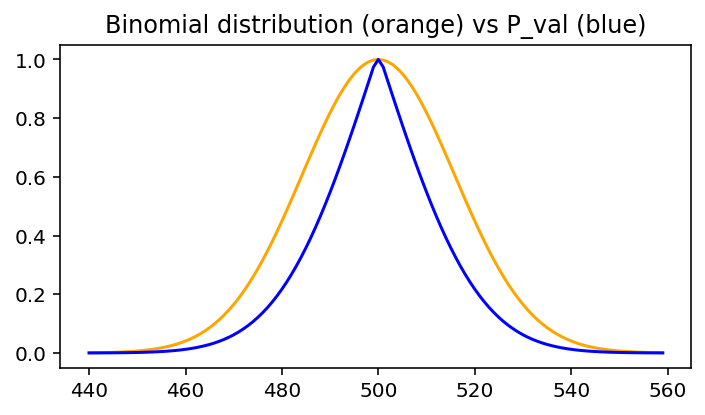

In [6]:
fig, ax0 = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
i1 = int(0.44*N)
i2 = int(0.56*N)
_ = ax0.plot(xx[i1:i2],yy1[i1:i2], color='orange')
_ = ax0.plot(xx[i1:i2],yy0[i1:i2], color='blue')
_ = ax0.set_title('Binomial distribution (orange) vs P_val (blue)')
fig.tight_layout()
plt.show() ;

In [7]:
# Calculate P-value for 8 tails out of 10 flips
p_val = 0
for n in [8,9,10]:
    p_val += binom.pmf(n,10,0.5)
print(f"p_val = {p_val:.4f}")

p_val = 0.0547


m-2σ = 2429.29, p_val = 0.0461
m-σ  = 2464.64, p_val = 0.3153
m    = 2500.00, p_val = 1.0000
m+σ  = 2535.36, p_val = 0.3292
m+2σ = 2570.71, p_val = 0.0493


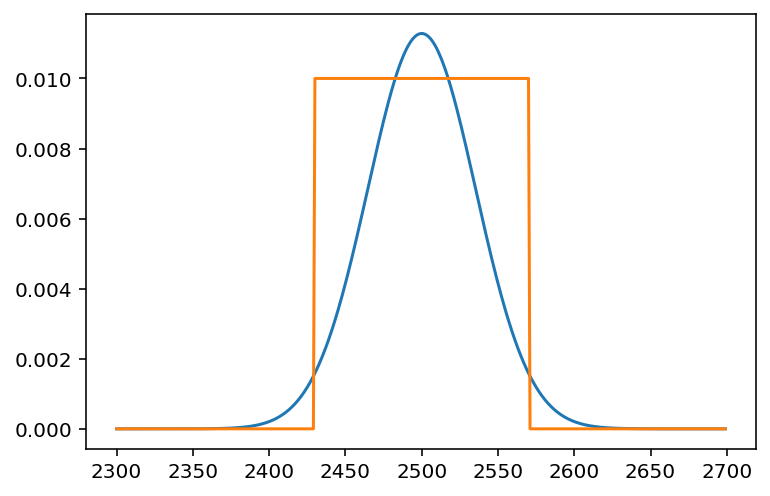

In [11]:
# Approximating binomial distribution with Gaussian
xx  = []
yy  = []
yy2 = []
sigma = math.sqrt(5000)/2.0
Nmean = 5000/2 
# --------------------------------
x = Nmean-2*sigma
p_val = binom_test(x, 5000)
print(f"m-2σ = {x:.2f}, p_val = {p_val:.4f}")
# --------------------------------
x = Nmean-sigma
p_val = binom_test(x, 5000)
print(f"m-σ  = {x:.2f}, p_val = {p_val:.4f}")
# --------------------------------
x = Nmean
p_val = binom_test(x, 5000)
print(f"m    = {x:.2f}, p_val = {p_val:.4f}")
# --------------------------------
x = Nmean + sigma
p_val = binom_test(x, 5000)
print(f"m+σ  = {x:.2f}, p_val = {p_val:.4f}")
# --------------------------------
x = Nmean + 2*sigma
p_val = binom_test(x, 5000)
print(f"m+2σ = {x:.2f}, p_val = {p_val:.4f}")
# --------------------------------

# show binomial distribution and positions of +/- 2*sigma range
v1 = 2500-2*sigma
v2 = 2500+2*sigma

for ii in range (2300, 2700):
    xx.append(ii)
    yy.append(binom.pmf(ii,5000,0.5))
    val = 0.0
    if v1 <= ii <= v2:
        val = 0.01
    yy2.append(val)
_ = plt.plot(xx,yy)
_ = plt.plot(xx,yy2)

In [12]:
# Calculate P-value for N=5000, tails = 2570
p_val = binom_test(x=2570, n=5000)
print(f"p_val = {p_val:.4f}")

p_val = 0.0493


In [13]:
# Calculate chi-square statistics
mychi2 = (2570 - 2500)**2 / 2500  +  (2430 - 2500)**2 / 2500 
# Calculate p_value using survival function (sf):
p_val = chi2.sf(mychi2,1)
print(f"chi2 = {mychi2:.2f}, p_val = {p_val:.4f}")

chi2 = 3.92, p_val = 0.0477
